In [1]:
pwd

'/share/home3/gpatlewi/python/Dow'

In [2]:
import os


In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('rxn_domains.csv')

In [6]:
df[df['Mech_Domain'] == 'MA']

# Mech_Domain             Alert  \
11  2          MA  Michael Acceptor   
12  2          MA  Michael Acceptor   
13  2          MA  Michael Acceptor   
14  2          MA  Michael Acceptor   
15  2          MA  Michael Acceptor   
16  2          MA  Michael Acceptor   
17  2          MA  Michael Acceptor   
18  2          MA  Michael Acceptor   
19  2          MA  Michael Acceptor   
20  2          MA  Michael Acceptor   
21  2          MA  Michael Acceptor   
22  2          MA  Michael Acceptor   
23  2          MA  Michael Acceptor   
24  2          MA  Michael Acceptor   
25  2          MA  Michael Acceptor   
26  2          MA  Michael Acceptor   
27  2          MA  Michael Acceptor   
28  2          MA  Michael Acceptor   
29  2          MA  Michael Acceptor   
30  2          MA  Michael Acceptor   

                                       SMARTS_pattern  
11                               [CX3!H0]=[#6]-[#6]=O  
12  [$([#7]=[#6]-1-[#6]=[#6!H0]-[#6](=[#7])-[#6]=[...  
13                                  [C!H0]=[C]-[#6]=O  
14                                   [CX3!H0]=[#6]C#N  
15                        [CX3!H0]=[#6]-[NX3](=O)(=O)  
16                      [#8-]-[#7+](=O)-[#6]=[CX3!H0]  
17                  [CX3!H0]=[#6]-[#6]-[NX3+](=O)[O-]  
18  [$(O=[#6]-1-[#6!H0]=[#6]-1),$(O=[#6]-1-[#6]=[#...  
19  [$([#6;A][#6,O]-[#6](=O)C#[#6!H0]),$(O=[#6]C#[...  
20  [$([#6!H0]=[#6]-[#6]-1=[#6]-[#6]=[#6]-[#6]=[#7...  
21  [$([#6]-[#6](-[#6]=[#6!H0])=N([#8])=O),$([#8]N...  
22                           [#6]\[#6!H0]=[#6]/[#6]=O  
23              O=[#6]-1-[#7]-[#6](=O)-[#6!H0]=[#6]-1  
24  [$(O=[#6]-1-[#8]-c2ccccc2-[CX2!H0]=[#6]-1),$(O...  
25                                    [#6](=O)C#C[#6]  
26                               [CX3!H0]=[#6]-[#6]=O  
27                         [#6]S(=O)(=O)[#6]=[CX3!H0]  
28  [$([CX3!H0]=[#6]-c1ccncc1),$([CX3!H0]=[C]c1ccc...  
29  [$(O=[#6]-1-[#6]=[#6!H0]-[#6](=O)-[#6]=[#6]-1)...  
30  [$(O=[#6]-1-[#8]-[#6]-[#6]=[#6]-1),$(O=[#6]-1-...

In [7]:
df = df.set_index('#')

In [8]:
def grouper(index):
    floatindex = float(index)
    intindex = int(floatindex)        
    return intindex

In [9]:
smarts_df = df.groupby(grouper)

In [10]:
mech_dict = {}
for i,group in smarts_df:
    key = [name for name in group['Mech_Domain'] if name!=' '][0]
    value = set(group['SMARTS_pattern'])
    mech_dict[key]=value

In [11]:
Dow_smarts = {k : [Chem.MolFromSmarts(s) for s in v] for k,v in mech_dict.items()}

In [12]:
#RDkit smarts for the set of reactivity alerts published by Dow. Dictionary of the smarts patterns
Dow_smarts['MA']

In [13]:
enoch = pd.read_csv('Enoch.csv')

In [14]:
enoch.head()

#  Mech                                             SMARTS
0  1  SNAR  c1([F,Cl,Br,I,$(N(=O)~O)])c([F,Cl,Br,I,$(N(=O)...
1  1  SNAR  c1([F,Cl,Br,I,$(N(=O)~O)])c([F,Cl,Br,I,$(N(=O)...
2  1  SNAR  c1([F,Cl,Br,I,$(N(=O)~O)])ncc([F,Cl,Br,I,$(N(=...
3  1  SNAR  c1([F,Cl,Br,I,$(N(=O)~O)])ncccc1([F,Cl,Br,I,$(...
4  1  SNAR                   c1([F,Cl,Br,I,$(N(=O)~O)])ncccn1

In [15]:
enoch_df = enoch.set_index('#')

In [16]:
enoch_df = enoch_df.groupby(grouper)

In [17]:
enoch_dict = {}
for i,group in enoch_df:
    key = [name for name in group['Mech'] if name!=' '][0]
    value = set(group['SMARTS'])
    enoch_dict[key]=value

In [18]:
enoch_smarts = {k : [Chem.MolFromSmarts(s) for s in v] for k,v in enoch_dict.items()}

In [19]:
{k:len(v) for k,v in enoch_dict.items()}

{'SNAR': 8, 'SB': 14, 'MA': 26, 'Acyl': 9, 'SN2': 9}

In [20]:
{k:len(v) for k,v in mech_dict.items()}

{'Acyl': 11, 'MA': 19, 'SNAR': 14, 'SB': 4, 'SN2': 23}

In [21]:
enoch_crt = pd.read_csv('Enoch_CRT.csv')

In [22]:
enoch_crt_df = enoch_crt.set_index('#')

In [23]:
enoch_crt = enoch_crt_df.groupby(grouper)

In [25]:
crt_dict = {}
for i,group in enoch_crt:
    key = [name for name in group['Mech'] if name!=' '][0]
    value = set(group['SMARTS'])
    crt_dict[key]=value

In [26]:
oecd_smarts = {k : [Chem.MolFromSmarts(s) for s in v] for k,v in crt_dict.items()}

In [27]:
crt_len = {k:len(v) for k,v in crt_dict.items()}

In [28]:
crt_len

{'Acyl': 17, 'MA': 34, 'SB': 11, 'SN2': 39, 'SNAr': 1}

In [29]:
enoch_len = {k:len(v) for k,v in enoch_dict.items()}
dow_len = {k:len(v) for k,v in mech_dict.items()}

In [30]:
print(sum([e for e in crt_len.values()]))

print(sum([e for e in enoch_len.values()]))
print(sum([e for e in dow_len.values()]))

102
66
71


In [31]:
counts = pd.read_csv('counts_mech.csv')

In [32]:
counts

Unnamed: 0  #Enoch_Patterns  #OECD_Patterns  #Dow_Patterns
0       Acyl                9              17             11
1         MA               26              34             19
2         SB               14              11              4
3        SN2                9              39             23
4       SNAR                8               1             14

In [33]:
counts.rename(columns = {'Unnamed: 0':'Mech'}, inplace = True)

In [34]:
counts

Mech  #Enoch_Patterns  #OECD_Patterns  #Dow_Patterns
0  Acyl                9              17             11
1    MA               26              34             19
2    SB               14              11              4
3   SN2                9              39             23
4  SNAR                8               1             14

[(0, 40)]

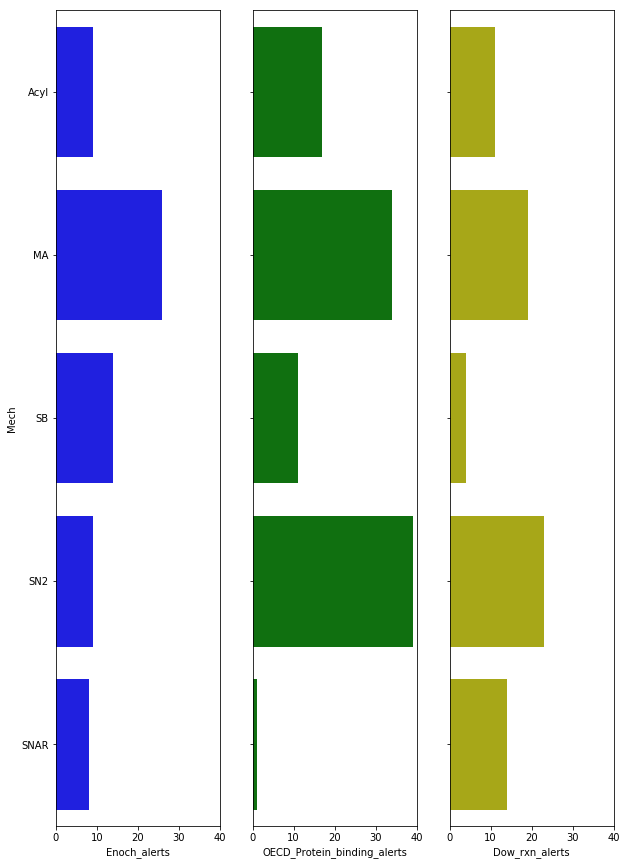

In [35]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,15), sharey = True)


sns.barplot(x = '#Enoch_Patterns', y = 'Mech', color = 'b',label = "Enoch_alerts", data = counts, ax=ax1)
sns.barplot(x = '#OECD_Patterns', y = 'Mech', color = 'g',label = "OECD_Protein_binding_alerts", data = counts, ax = ax2)
sns.barplot(x = '#Dow_Patterns', y = 'Mech', color = 'y',label = "Dow_rxn_alerts", data = counts, ax= ax3)
ax1.set_ylabel('Mech')
ax2.set_ylabel('')
ax3.set_ylabel('')


ax1.set_xlabel('Enoch_alerts')
ax2.set_xlabel('OECD_Protein_binding_alerts')
ax3.set_xlabel('Dow_rxn_alerts')

ax1.set(xlim=(0,40))
ax2.set(xlim=(0,40))
ax3.set(xlim=(0,40))

In [36]:
roberts = {'MA':55, 'SNAR':3, 'SN2':42, 'SB':40, 'Acyl': 26, 'Spec':12, 'Non':32}
roberts_df = pd.DataFrame(roberts, index = ['Domain'])

In [37]:
roberts_df = roberts_df.T

In [38]:
roberts_df = roberts_df.reset_index()

In [39]:
roberts_df.rename(columns = {'index':'Mech'}, inplace = True)

In [40]:
roberts_df 

Mech  Domain
0    MA      55
1  SNAR       3
2   SN2      42
3    SB      40
4  Acyl      26
5  Spec      12
6   Non      32

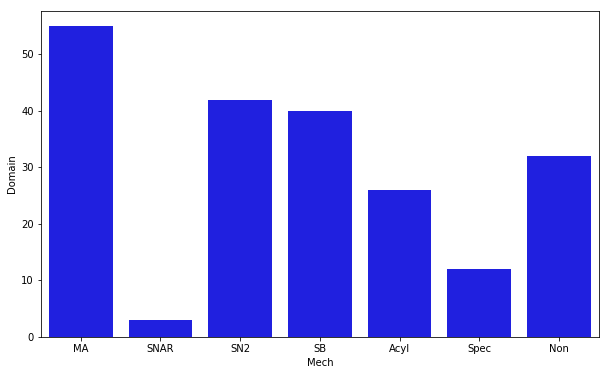

In [41]:
f,ax = plt.subplots(1, figsize=(10,6))

f = sns.barplot(x = 'Mech', y = 'Domain', color = 'b',label = "Roberts", data = roberts_df)

In [42]:
roberts_df.sum()

Mech      MASNARSN2SBAcylSpecNon
Domain                       210
dtype: object

In [43]:
jrc = pd.read_csv('JRC.csv')

In [44]:
jrc.head()

DTXSID       CASRN                          SMILES  \
0   DTXSID1031626   1896-62-4          CC(=O)\C=C\C1=CC=CC=C1   
1   DTXSID4051879   2277-19-2                  CC\C=C/CCCCC=O   
2  DTXSID00231670  82297-64-1     CCC(=O)\C=C\C1=CC=C(OC)C=C1   
3   DTXSID7049398    116-26-7          CC1=C(C=O)C(C)(C)CC=C1   
4   DTXSID7026235    552-30-7  OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1   

  reaction_chemistry_domain  LLNA  DPRA KeratinoSens  hCLAT  
0                        MA     1   1.0            1    1.0  
1                        SB     1   0.0            1    NaN  
2                        MA     1   1.0            1    NaN  
3                        MA     1   1.0            1    NaN  
4                      Acyl     1   1.0            0    1.0

In [45]:
len(jrc)

222

In [46]:
#Dictionary of the jrc chemicals
jrc_dict = { k:v for (k,v) in zip(jrc['DTXSID'], jrc['SMILES'])}

In [47]:
#jrc rdkit dictionary
jrc_smiles = {k : Chem.MolFromSmiles(v) for k,v in jrc_dict.items()}

In [48]:
len(jrc_smiles)

222

In [49]:
jrc_Dow = {x:[k for k, v in Dow_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in jrc_smiles.items()}

In [50]:
jrc_Enoch = {x:[k for k, v in enoch_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in jrc_smiles.items()}

In [51]:
jrc_OECD = {x:[k for k, v in oecd_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in jrc_smiles.items()}

In [52]:
Dow_jrc_smarts = {x: [{k:Chem.MolToSmarts(e)}  for k, v in Dow_smarts.items() for e in v if y.HasSubstructMatch(e)] for x,y in jrc_smiles.items() }

In [53]:
Enoch_jrc_smarts = {x: [{k:Chem.MolToSmarts(e)}  for k, v in enoch_smarts.items() for e in v if y.HasSubstructMatch(e)] for x,y in jrc_smiles.items() }

In [54]:
OECD_jrc_smarts = {x: [{k:Chem.MolToSmarts(e)}  for k, v in oecd_smarts.items() for e in v if y.HasSubstructMatch(e)] for x,y in jrc_smiles.items() }

In [55]:
a = {k:v for k,v in Dow_jrc_smarts.items()}
b = {k:v for k,v in Enoch_jrc_smarts.items()}
c = {k:v for k,v in OECD_jrc_smarts.items()}

In [56]:
len(b)

222

In [57]:
a

{'DTXSID1031626': [{'MA': '[C&X3&!H0]=[#6]-[#6]=O'},
  {'MA': '[C&!H0]=C-[#6]=O'},
  {'MA': '[#6]-[#6&!H0]=[#6]-[#6]=O'}],
 'DTXSID4051879': [{'SB': '[$([#6,#1]-,:[C&H1&X3]=O),$([C&H2&X3]=O),$([C&X3&H1](=O)-,:[#6])]'}],
 'DTXSID00231670': [{'MA': '[C&X3&!H0]=[#6]-[#6]=O'},
  {'MA': '[C&!H0]=C-[#6]=O'},
  {'MA': '[#6]-[#6&!H0]=[#6]-[#6]=O'}],
 'DTXSID7049398': [{'SB': '[$([#6,#1]-,:[C&H1&X3]=O),$([C&H2&X3]=O),$([C&X3&H1](=O)-,:[#6])]'}],
 'DTXSID7026235': [{'Acyl': '[$(O=[#6]1-[#8]-[#6](=O)-[#6]2=[#6]-1-[#6]=[#6]-[#6]=[#6]-2),$(O=[#6]1-[#8]-[#6](=O)-c2:,-c:,-c:,-c:,-c:,-c:,-2-1),$(O=[#6]1-[#8]-[#6](=O)-[#6]2=[#6]-1-[#6]=[#6]-[#6]=[#6]-2),$([#6]-[#6]1=[#7]-[#6]-[#6](=O)-[#8]-1)]'},
  {'Acyl': 'O=[#6]1-[#8]-[#6](=O)-c2:,-c:,-c:,-c:,-c:,-c:,-2-1'}],
 'DTXSID5032523': [{'SN2': '[$([#6,#1;A]-,:[#7]1-[#16]-[#6]=[#6]-[#6]-1=O),$([#6]-n1:,-s:,-c:,-c:,-c:,-1=O),$([#6]-n1:,-s:,-c:,-c:,-c:,-1=O),$(O=c1:,-c:,-c:,-s:,-n:,-1)]'}],
 'DTXSID8026515': [{'Acyl': 'C-C(=O)-[#8]-C(-[#6])=O'}],
 'DTXSID50218

In [58]:
rows = [{'DTXSID':sid, 'Dow_Mech': md, 'Dow_SMARTS' :smarts} for sid, list_dicts in a.items() for d in list_dicts for md,smarts in d.items()]


In [59]:
a_df = pd.DataFrame(rows)

In [60]:
a_df.head()

DTXSID Dow_Mech                                         Dow_SMARTS
0   DTXSID1031626       MA                             [C&X3&!H0]=[#6]-[#6]=O
1   DTXSID1031626       MA                                   [C&!H0]=C-[#6]=O
2   DTXSID1031626       MA                          [#6]-[#6&!H0]=[#6]-[#6]=O
3   DTXSID4051879       SB  [$([#6,#1]-,:[C&H1&X3]=O),$([C&H2&X3]=O),$([C&...
4  DTXSID00231670       MA                             [C&X3&!H0]=[#6]-[#6]=O

In [61]:
a_df['Dow_Mech'].unique()

array(['MA', 'SB', 'Acyl', 'SN2', 'SNAR'], dtype=object)

In [62]:
len(a)

222

In [63]:
vale_to_int = {value: i for i, value in enumerate(sorted(pd.unique(a_df['Dow_Mech'].values.ravel())))}

In [64]:
mysm = {value: 'Dow' + str(i) for i, value in enumerate(sorted(pd.unique(a_df['Dow_SMARTS'].values.ravel())))}

In [65]:
a_df = a_df.replace(mysm)

In [66]:
len(a_df)

159

In [67]:
a_df = a_df.replace(vale_to_int)

In [68]:
a_df.head()

DTXSID  Dow_Mech Dow_SMARTS
0   DTXSID1031626         1      Dow29
1   DTXSID1031626         1      Dow27
2   DTXSID1031626         1       Dow7
3   DTXSID4051879         2      Dow22
4  DTXSID00231670         1      Dow29

In [69]:
a_pt = a_df.pivot(index='DTXSID', columns='Dow_SMARTS', values='Dow_Mech')

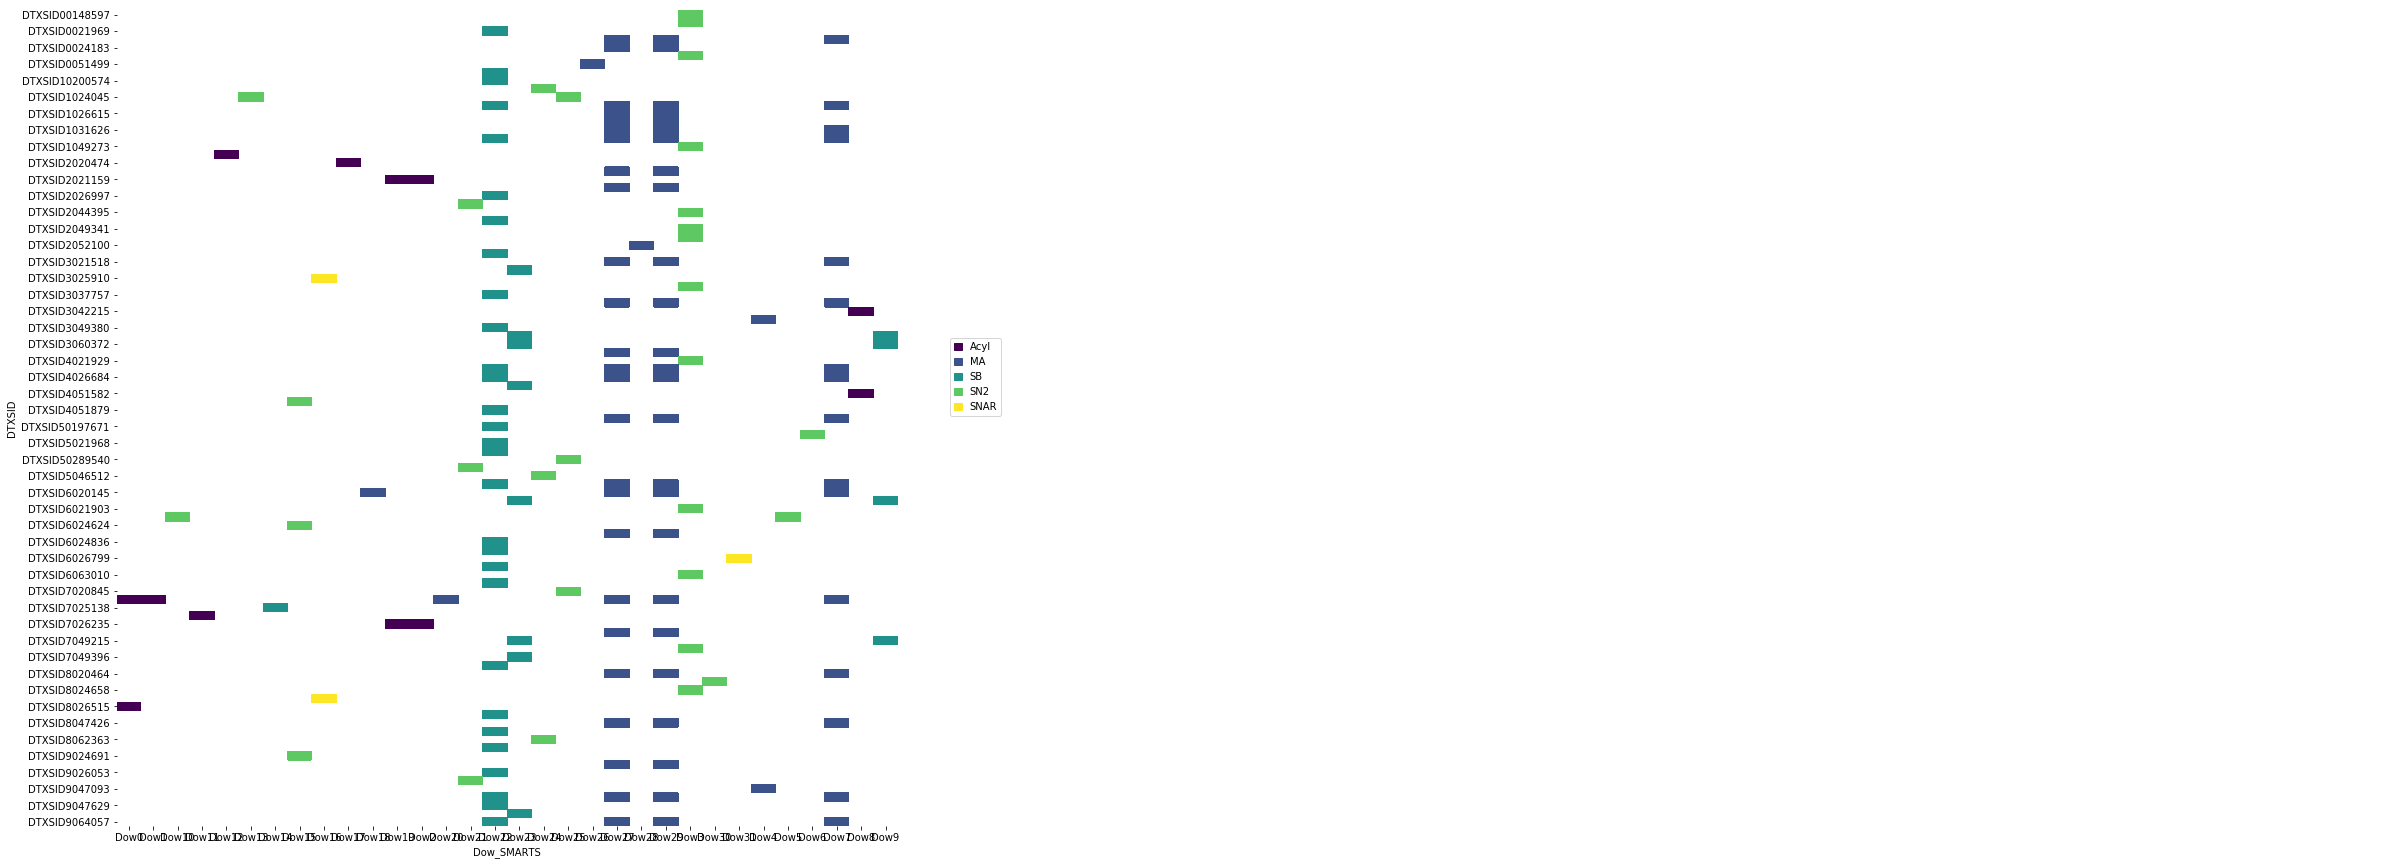

In [70]:
import matplotlib.patches as mpatches
#plt.subplots(1, figsize=(12,15))
f, ax = plt.subplots(1, figsize=(20,15))

hm = sns.heatmap(a_pt,cmap="viridis",ax = ax, cbar=False)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
legend_ax = f.add_axes([.7, .5, 1, .1])
legend_ax.axis('off')
# reconstruct color map
colors = plt.cm.viridis(np.linspace(0, 1, len(vale_to_int)))
# add color map to legend
patches = [mpatches.Patch(facecolor=c, edgecolor=c) for c in colors]
legend = legend_ax.legend(patches,
    sorted(vale_to_int.keys()),
    handlelength=0.8, loc='lower left')
for t in legend.get_texts():
    t.set_ha("left")

In [71]:
Enochrows = [{'DTXSID':sid, 'Enoch_Mech': md, 'Enoch_SMARTS' :smarts} for sid, list_dicts in b.items() for d in list_dicts for md,smarts in d.items()]

In [72]:
OECDrows = [{'DTXSID':sid, 'OECD_Mech': md, 'SMARTS' :smarts} for sid, list_dicts in c.items() for d in list_dicts for md,smarts in d.items()]

In [73]:
b_df = pd.DataFrame(Enochrows)
c_df = pd.DataFrame(OECDrows)

In [74]:
b_df = b_df.replace(vale_to_int)

In [75]:
mye = {value: 'Enoch' + str(i) for i, value in enumerate(sorted(pd.unique(b_df['Enoch_SMARTS'].values.ravel())))}

In [76]:
b_df = b_df.replace(mye)

In [77]:
c_df['OECD_Mech'].unique()

array(['MA', 'SN2', 'SB', 'Acyl', 'SNAr'], dtype=object)

In [78]:
value_to_int = {value: i for i, value in enumerate(sorted(pd.unique(c_df['OECD_Mech'].values.ravel())))}

In [79]:
myo = {value: 'OECD' + str(i) for i, value in enumerate(sorted(pd.unique(c_df['SMARTS'].values.ravel())))}

In [80]:
c_df = c_df.replace(value_to_int)
c_df = c_df.replace(myo)

In [81]:

b_pt = b_df.pivot(index='DTXSID', columns='Enoch_SMARTS', values='Enoch_Mech')
c_pt = c_df.pivot(index='DTXSID', columns='SMARTS', values='OECD_Mech')

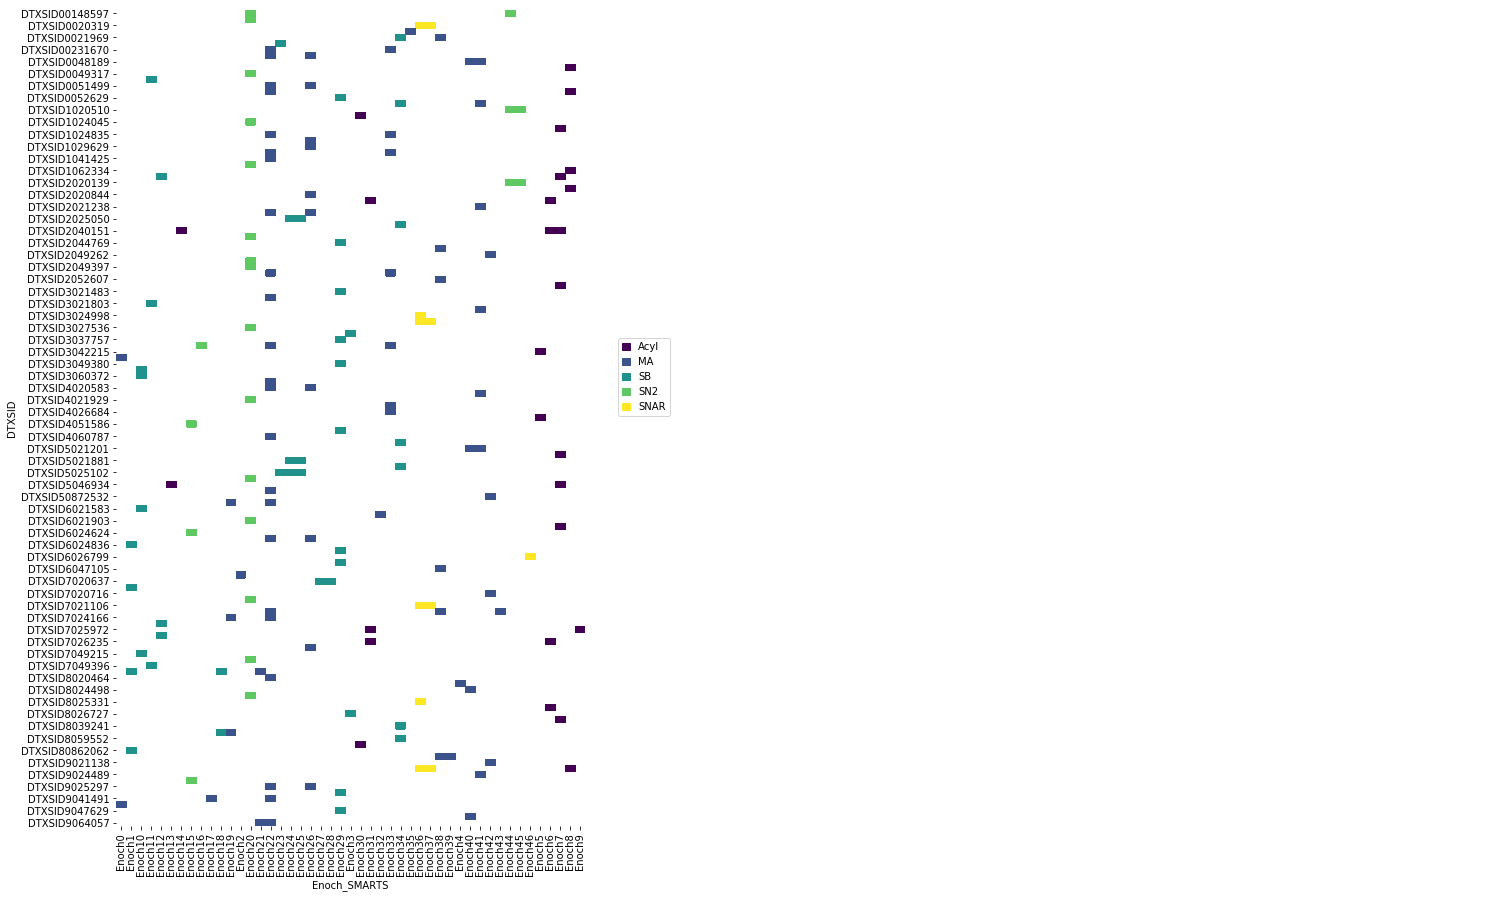

In [82]:
f, ax = plt.subplots(1, figsize=(12,15))
hm = sns.heatmap(b_pt,cmap="viridis", ax=ax, cbar=False)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
legend_ax = f.add_axes([.7, .5, 1, .1])
legend_ax.axis('off')
# reconstruct color map
colors = plt.cm.viridis(np.linspace(0, 1, len(vale_to_int)))
# add color map to legend
patches = [mpatches.Patch(facecolor=c, edgecolor=c) for c in colors]
legend = legend_ax.legend(patches,
    sorted(vale_to_int.keys()),
    handlelength=0.8, loc='lower left')
for t in legend.get_texts():
    t.set_ha("left")

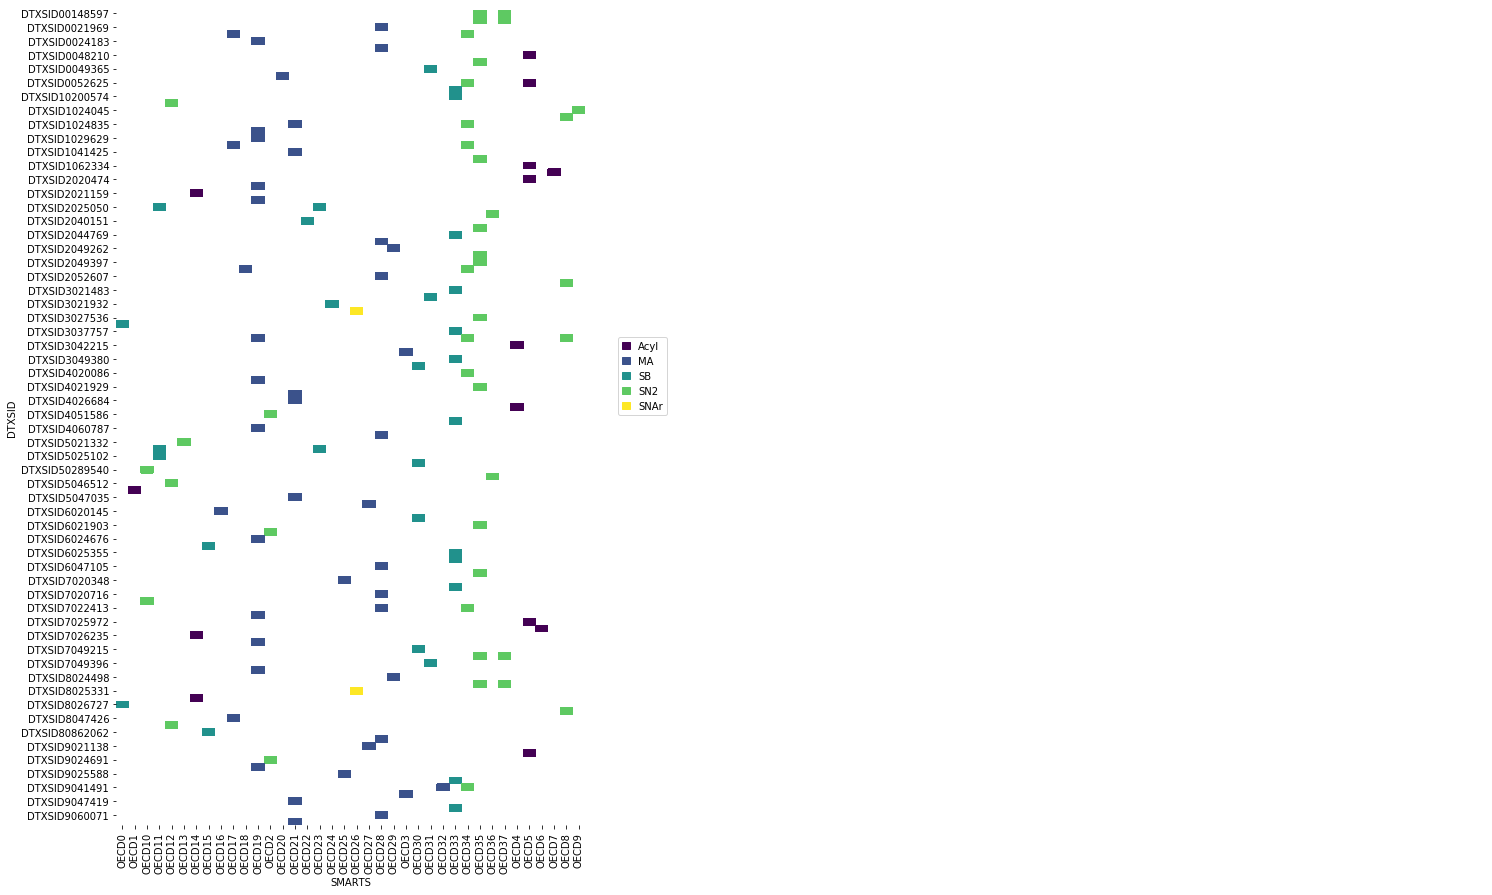

In [83]:
f, ax = plt.subplots(1, figsize=(12,15))
hm = sns.heatmap(c_pt,cmap="viridis", ax=ax, cbar=False)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
legend_ax = f.add_axes([.7, .5, 1, .1])
legend_ax.axis('off')
# reconstruct color map
colors = plt.cm.viridis(np.linspace(0, 1, len(value_to_int)))
# add color map to legend
patches = [mpatches.Patch(facecolor=c, edgecolor=c) for c in colors]
legend = legend_ax.legend(patches,
    sorted(value_to_int.keys()),
    handlelength=0.8, loc='lower left')
for t in legend.get_texts():
    t.set_ha("left")

In [84]:
print(len(a_pt))
print(len(b_pt))
print(len(c_pt))

99
135
118


In [85]:
d = pd.merge(a_pt,b_pt, on = 'DTXSID', how = 'outer')
print(len(d))
e = pd.merge(d,c_pt, on = 'DTXSID', how = 'outer')
print(len(e))

144
147


In [86]:
e.head()

Dow0  Dow1  Dow10  Dow11  Dow12  Dow13  Dow14  Dow15  Dow16  \
DTXSID                                                                        
DTXSID00148597   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DTXSID0020153    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DTXSID0021969    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DTXSID00231670   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DTXSID0024183    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                Dow17  ...    OECD34  OECD35  OECD36  OECD37  OECD4  OECD5  \
DTXSID                 ...                                                   
DTXSID00148597    NaN  ...       NaN     3.0     NaN     3.0    NaN    NaN   
DTXSID0020153     NaN  ...       NaN     3.0     NaN     3.0    NaN    NaN   
DTXSID0021969     NaN  ...       NaN     NaN     NaN     NaN    NaN    NaN   
DTXSID00231670    NaN  ...       3.0     NaN     NaN     NaN    NaN    NaN   
DTXSID0024183     NaN  ...       NaN     NaN     NaN     NaN    NaN    NaN   

                OECD6  OECD7  OECD8  OECD9  
DTXSID                                      
DTXSID00148597    NaN    NaN    NaN    NaN  
DTXSID0020153     NaN    NaN    NaN    NaN  
DTXSID0021969     NaN    NaN    NaN    NaN  
DTXSID00231670    NaN    NaN    NaN    NaN  
DTXSID0024183     NaN    NaN    NaN    NaN  

[5 rows x 117 columns]

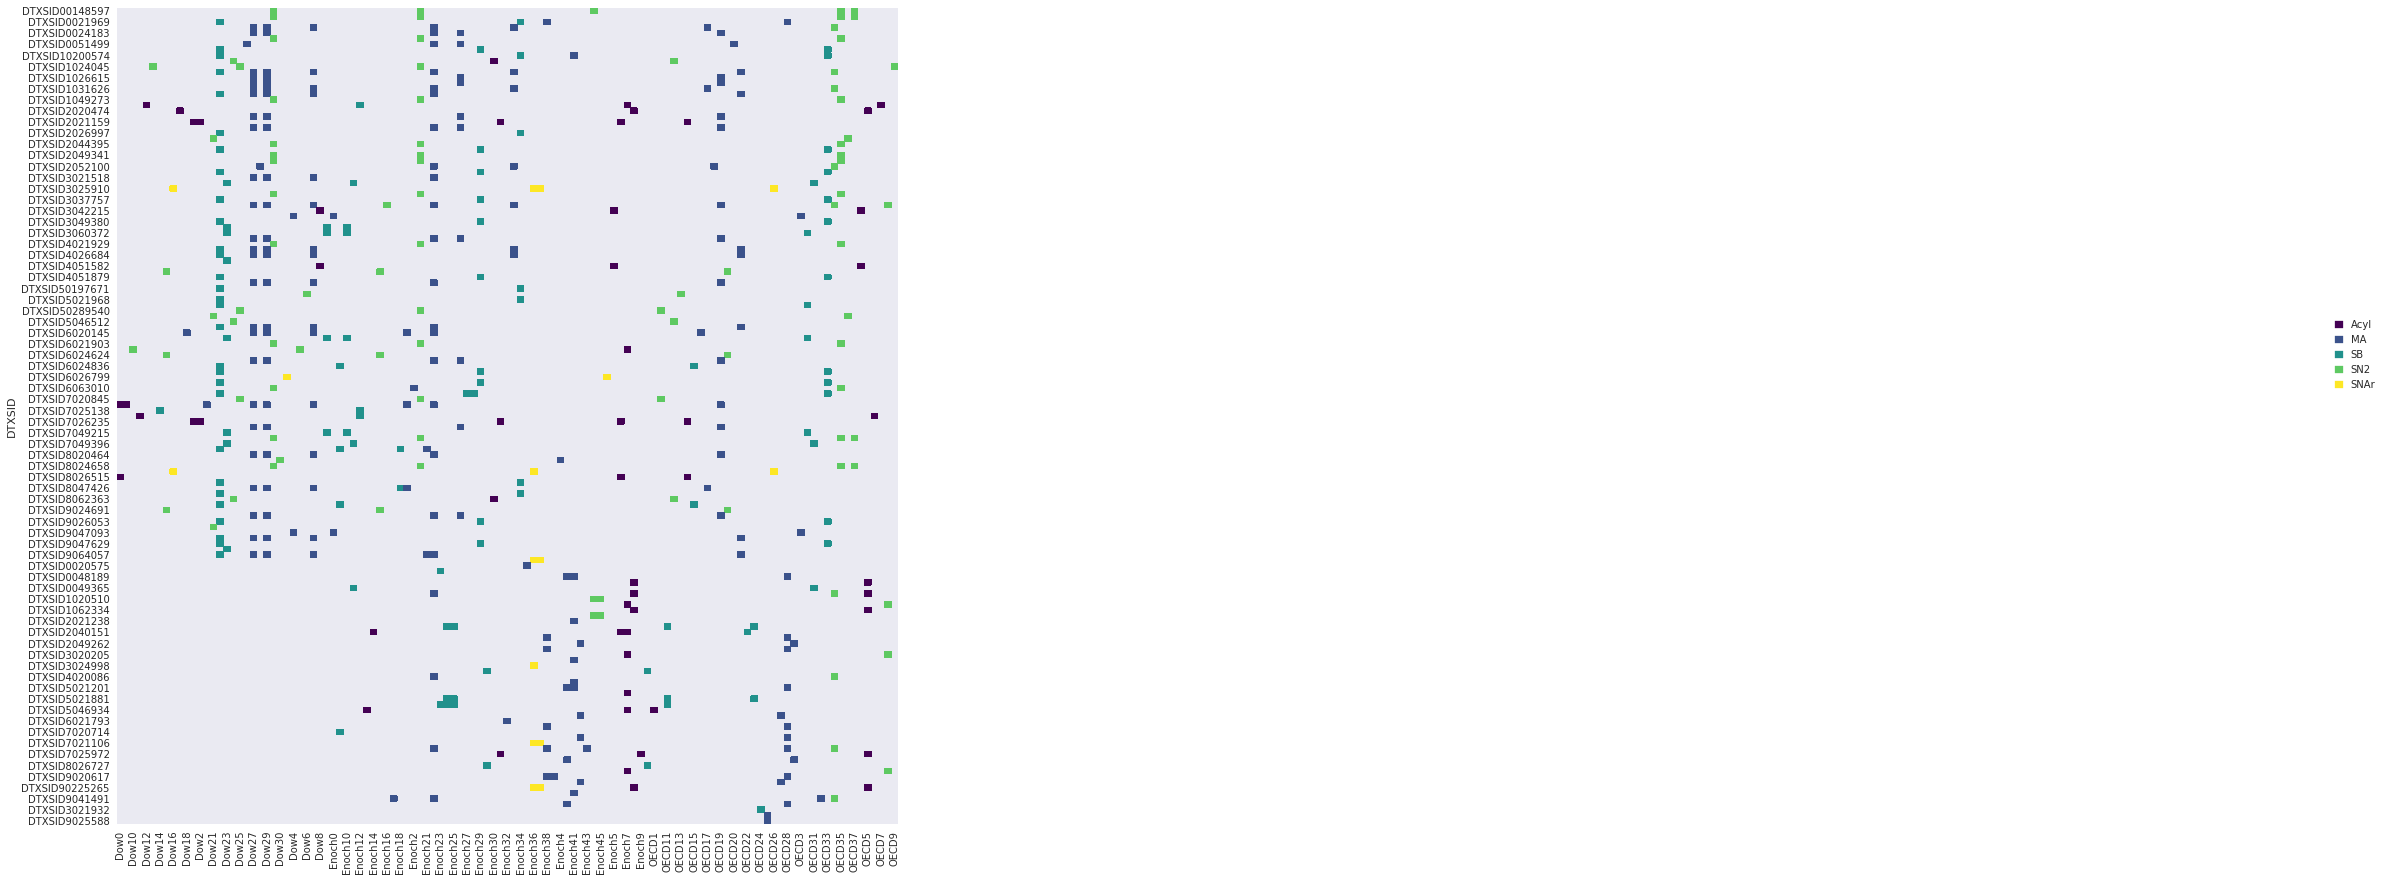

In [87]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(20,15)})
f, ax = plt.subplots(1,figsize=(20,15))
sns.heatmap(e,cmap="viridis", ax=ax, cbar=False)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
legend_ax = f.add_axes([.7, .5, 1, .1])
legend_ax.axis('off')
# reconstruct color map
colors = plt.cm.viridis(np.linspace(0, 1, len(value_to_int)))
# add color map to legend
patches = [mpatches.Patch(facecolor=c, edgecolor=c) for c in colors]
legend = legend_ax.legend(patches,
    sorted(value_to_int.keys()),
    handlelength=0.8, loc='best')
for t in legend.get_texts():
    t.set_ha("left")


In [102]:
jrc_all = pd.read_csv('jrc_allpred_merged.csv')

In [103]:
jrc_all

DTXSID       CASRN  \
0     DTXSID1031626   1896-62-4   
1     DTXSID4051879   2277-19-2   
2    DTXSID00231670  82297-64-1   
3     DTXSID7049398    116-26-7   
4     DTXSID7026235    552-30-7   
5     DTXSID5032523   2634-33-5   
6     DTXSID8026515     85-42-7   
7     DTXSID5021881    107-15-3   
8     DTXSID4021137    108-45-2   
9     DTXSID9021138    106-50-3   
10    DTXSID1049273   3344-77-2   
11    DTXSID3021803     93-91-4   
12    DTXSID6021903    109-65-9   
13    DTXSID2044395    143-15-7   
14    DTXSID2049397    112-82-3   
15    DTXSID4021929    111-25-1   
16    DTXSID1021740     71-36-3   
17    DTXSID1041263     83-42-1   
18   DTXSID00148597   1086-00-6   
19    DTXSID3027536   3386-33-2   
20    DTXSID0049317    544-77-4   
21    DTXSID2049341    638-45-9   
22    DTXSID3029152    119-10-8   
23    DTXSID6021793     90-15-3   
24    DTXSID4051586   1139-30-6   
25    DTXSID3060372    579-07-7   
26    DTXSID7049396   1118-71-4   
27    DTXSID8020462    111-46-6   
28    DTXSID6021583    431-03-8   
29    DTXSID3025910     88-88-0   
..              ...         ...   
192   DTXSID3021483    122-78-1   
193   DTXSID9026342     60-12-8   
194   DTXSID2021159     85-44-9   
195   DTXSID2026997    123-11-5   
196   DTXSID5021201    121-79-9   
197   DTXSID4022527     94-13-3   
198   DTXSID0021206     57-55-6   
199   DTXSID9021924    110-86-1   
200   DTXSID2021238    108-46-3   
201   DTXSID5021251     81-07-2   
202   DTXSID7026368     69-72-7   
203   DTXSID0047111    515-03-7   
204   DTXSID1026031    151-21-3   
205   DTXSID9049409   2892-51-5   
206  DTXSID30200334   5231-87-8   
207   DTXSID9026053   3810-74-0   
208   DTXSID6023602    110-15-6   
209   DTXSID4023622     63-74-1   
210   DTXSID6024464    121-57-3   
211   DTXSID8023632     87-69-4   
212  DTXSID90225265   7426-07-5   
213   DTXSID5021332    137-26-8   
214   DTXSID5046512     96-27-5   
215   DTXSID7026156    584-84-9   
216   DTXSID5047035   3913-81-3   
217   DTXSID1041425   6728-26-3   
218   DTXSID8049416    533-75-5   
219   DTXSID3037757    112-45-8   
220   DTXSID0021969    121-33-5   
221   DTXSID8021438     75-35-4   

                                                SMILES  \
0                               CC(=O)\C=C\C1=CC=CC=C1   
1                                       CC\C=C/CCCCC=O   
2                          CCC(=O)\C=C\C1=CC=C(OC)C=C1   
3                               CC1=C(C=O)C(C)(C)CC=C1   
4                       OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1   
5                                   O=C1NSC2=C1C=CC=C2   
6                                  O=C1OC(=O)C2CCCCC12   
7                                                 NCCN   
8                                      NC1=CC(N)=CC=C1   
9                                      NC1=CC=C(N)C=C1   
10                                     OCCCCCCCCCCCCBr   
11                             CC(=O)CC(=O)C1=CC=CC=C1   
12                                              CCCCBr   
13                                      CCCCCCCCCCCCBr   
14                                  CCCCCCCCCCCCCCCCBr   
15                                            CCCCCCBr   
16                                               CCCCO   
17                        CC1=C(C=CC=C1Cl)[N+]([O-])=O   
18               ClCC1=C2C=CC3=CC=CC4=C3C2=C(C=C1)C=C4   
19                                CCCCCCCCCCCCCCCCCCCl   
20                                   CCCCCCCCCCCCCCCCI   
21                                             CCCCCCI   
22                        COC1=CC=C(C)C=C1[N+]([O-])=O   
23                                OC1=CC=CC2=CC=CC=C12   
24      C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2   
25                              CC(=O)C(=O)C1=CC=CC=C1   
26                         CC(C)(C)C(=O)CC(=O)C(C)(C)C   
27                                             OCCOCCO   
28                                        CC(=O)C(C)=O   
29   [O-][N+](=O)C1=CC(=C(Cl)C(=C1)[N+]([O-])=O)[N+...   
..                                          

In [104]:
jrc_all['OECD'] = jrc_all['OECD'].str.replace(r"\['SNAr']", "['SNAR']")

In [105]:
jrc_all['Expert_Mech'] = jrc_all['Expert_Mech'].str.replace(r"\['SNAr']", "['SNAR']")

In [106]:
jrc_all['Enoch'] = jrc_all['Enoch'].str.replace(r"\['SB', 'MA']", "['MA', 'SB']")

In [107]:
jrc_all['Expert_Mech'] = jrc_all['Expert_Mech'].str.replace(r"\['Acyl','MA', ]", "['Acyl', 'MA']")

In [108]:
jrc_all['Enoch'] = jrc_all['Enoch'].str.replace(r"\['MA', 'Acyl']", "['Acyl', 'MA']")

In [109]:
len(jrc_all['Expert_Mech'].unique())

15

In [120]:
jrc_all['Enoch'].value_counts()

[]                  87
['MA']              49
['SB']              34
['SN2']             20
['Acyl']            18
['SNAR']             6
['MA', 'SB']         4
['SB', 'Acyl']       1
['MA', 'SN2']        1
['SNAR', 'Acyl']     1
['Acyl', 'MA']       1
Name: Enoch, dtype: int64

In [111]:
len(jrc_all['OECD'].unique())

8

In [112]:
len(jrc_all['Dow'].unique())

8

In [113]:
jrc_all['Expert_Mech'].value_counts()

[]                      62
['MA']                  52
['SB']                  34
['SN2']                 32
['Acyl']                14
['SNAR']                 6
['MA', 'SB']             6
['pre']                  6
['Special_case']         4
['pro', 'pre']           1
['MA', 'SN2', 'pre']     1
['Acyl', 'MA']           1
['MA','SN1']             1
['Acyl', 'pre']          1
['SN2', 'pre']           1
Name: Expert_Mech, dtype: int64

In [74]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
''''writer = pd.ExcelWriter('jrc_all_merged.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
jrc_all.to_excel(writer, sheet_name='jrc_merge')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
from sklearn import metrics

In [117]:
import seaborn as sns

In [118]:
cm = confusion_matrix(jrc_all['Expert_Mech'],jrc_all['Enoch'])

In [119]:
print(cm)

[[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  2  0  1  0 43  0  1  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  1  1  0  0 20  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  5]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  3  0  3

In [72]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [73]:
#show the classification report 
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Enoch']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.61      0.79      0.69        14
        ['MA', 'SB']       0.25      0.17      0.20         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.88      0.83      0.85        52
      ['SB', 'Acyl']       0.00      0.00      0.00         0
              ['SB']       0.76      0.76      0.76        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       1.00      0.62      0.77        32
    ['SNAR', 'Acyl']       0.00      0.00      0.00         0
            ['SNAR']       1.00      1.00      1.00         6
    ['Special_case']       0.00      0.00      0.00         4
       

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [82]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['OECD']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'SN2']       0.00      0.00      0.00         0
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.69      0.64      0.67        14
        ['MA', 'SB']       0.00      0.00      0.00         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.89      0.65      0.76        52
              ['SB']       0.71      0.59      0.65        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.84      0.89        32
            ['SNAR']       1.00      0.33      0.50         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      [

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [83]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Dow']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       1.00      1.00      1.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.75      0.43      0.55        14
        ['MA', 'SB']       0.14      0.17      0.15         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.95      0.38      0.55        52
              ['SB']       0.74      0.68      0.71        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.81      0.87        32
            ['SNAR']       1.00      0.50      0.67         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      ['pro', 'pre']       0.00      0.00      0.00         1
                  []       0.46      0.92      0.62        62

      

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
from sklearn.metrics import matthews_corrcoef

In [85]:
matthews_corrcoef(jrc_all['Expert_Mech'],jrc_all['Enoch'],sample_weight=None)

0.6625184284444612

In [86]:
matthews_corrcoef(jrc_all['Expert_Mech'],jrc_all['OECD'],sample_weight=None)

0.6120438438395858

In [87]:
matthews_corrcoef(jrc_all['Expert_Mech'],jrc_all['Dow'],sample_weight=None)

0.5468332759549412

In [88]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Dow']))


                      precision    recall  f1-score   support

      ['Acyl', 'MA']       1.00      1.00      1.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.75      0.43      0.55        14
        ['MA', 'SB']       0.14      0.17      0.15         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.95      0.38      0.55        52
              ['SB']       0.74      0.68      0.71        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.81      0.87        32
            ['SNAR']       1.00      0.50      0.67         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      ['pro', 'pre']       0.00      0.00      0.00         1
                  []       0.46      0.92      0.62        62

      

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['OECD']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'SN2']       0.00      0.00      0.00         0
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.69      0.64      0.67        14
        ['MA', 'SB']       0.00      0.00      0.00         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.89      0.65      0.76        52
              ['SB']       0.71      0.59      0.65        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.84      0.89        32
            ['SNAR']       1.00      0.33      0.50         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      [

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [90]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Enoch']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.61      0.79      0.69        14
        ['MA', 'SB']       0.25      0.17      0.20         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.88      0.83      0.85        52
      ['SB', 'Acyl']       0.00      0.00      0.00         0
              ['SB']       0.76      0.76      0.76        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       1.00      0.62      0.77        32
    ['SNAR', 'Acyl']       0.00      0.00      0.00         0
            ['SNAR']       1.00      1.00      1.00         6
    ['Special_case']       0.00      0.00      0.00         4
       

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [91]:
jrc_all.head()

DTXSID       CASRN                          SMILES  \
0   DTXSID1031626   1896-62-4          CC(=O)\C=C\C1=CC=CC=C1   
1   DTXSID4051879   2277-19-2                  CC\C=C/CCCCC=O   
2  DTXSID00231670  82297-64-1     CCC(=O)\C=C\C1=CC=C(OC)C=C1   
3   DTXSID7049398    116-26-7          CC1=C(C=O)C(C)(C)CC=C1   
4   DTXSID7026235    552-30-7  OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1   

  reaction_chemistry_domain Expert_Mech           OECD         Enoch  \
0                        MA      ['MA']  ['MA', 'SN2']        ['MA']   
1                        SB      ['SB']         ['SB']        ['SB']   
2                        MA      ['MA']  ['MA', 'SN2']        ['MA']   
3                        MA      ['MA']             []  ['MA', 'SB']   
4                      Acyl    ['Acyl']       ['Acyl']      ['Acyl']   

        Dow  LLNA  DPRA KeratinoSens  hCLAT  
0    ['MA']     1   1.0            1    1.0  
1    ['SB']     1   0.0            1    NaN  
2    ['MA']     1   1.0            1    NaN  
3    ['SB']     1   1.0            1    NaN  
4  ['Acyl']     1   1.0            0    1.0

In [92]:
all_correct = jrc_all[(jrc_all['Dow'] == jrc_all['OECD']) & (jrc_all['OECD'] == jrc_all['Enoch']) & (jrc_all['Expert_Mech'] == jrc_all['Dow'])]

In [93]:
#all_correct.to_csv('all_correct.csv')

In [94]:
len(all_correct)

109

In [95]:
all_incorrect = jrc_all[(jrc_all['Dow'] == jrc_all['OECD']) & (jrc_all['OECD'] == jrc_all['Enoch']) & (jrc_all['Expert_Mech'] != jrc_all['Dow'])]

In [121]:
all_incorrect

DTXSID       CASRN  \
11    DTXSID3021803     93-91-4   
22    DTXSID3029152    119-10-8   
28    DTXSID6021583    431-03-8   
48    DTXSID0049313    525-76-8   
66    DTXSID9020295    106-47-8   
69    DTXSID2044347    100-06-1   
79    DTXSID7022047    514-10-3   
81    DTXSID8020090     62-53-3   
82    DTXSID6044357    105-13-5   
86    DTXSID8021804     94-09-7   
89    DTXSID5020152    100-51-6   
101   DTXSID6040321    127-65-1   
108   DTXSID6024836   5392-40-5   
109   DTXSID3026726    106-22-9   
110   DTXSID7029871  23593-75-1   
127   DTXSID2046545    886-38-4   
149   DTXSID4038924   6259-76-3   
155   DTXSID5052414  68527-77-5   
162   DTXSID2029612    138-86-3   
163   DTXSID7025502     78-70-6   
175   DTXSID8060618    613-29-6   
187   DTXSID9047596    713-95-1   
206  DTXSID30200334   5231-87-8   
207   DTXSID9026053   3810-74-0   
218   DTXSID8049416    533-75-5   

                                                SMILES  \
11                             CC(=O)CC(=O)C1=CC=CC=C1   
22                        COC1=CC=C(C)C=C1[N+]([O-])=O   
28                                        CC(=O)C(C)=O   
48                             CC1=NC2=CC=CC=C2C(=O)O1   
66                                    NC1=CC=C(Cl)C=C1   
69                               COC1=CC=C(C=C1)C(C)=O   
79   CC(C)C1=CC2=CC[C@@H]3[C@](C)(CCC[C@@]3(C)C(O)=...   
81                                        NC1=CC=CC=C1   
82                                   COC1=CC=C(CO)C=C1   
86                              CCOC(=O)C1=CC=C(N)C=C1   
89                                       OCC1=CC=CC=C1   
101                [Na+].CC1=CC=C(C=C1)S(=O)(=O)[N-]Cl   
108                                 CC(C)=CCCC(C)=CC=O   
109                                   CC(CCO)CCC=C(C)C   
110  ClC1=C(C=CC=C1)C(N1C=CN=C1)(C1=CC=CC=C1)C1=CC=...   
127                   O=C1C(=C1C1=CC=CC=C1)C1=CC=CC=C1   
149                         CCCCCCOC1=C(C=CC=C1)C(O)=O   
155                                 CC1CC(C)=CC(C)C1CO   
162                                 CC(=C)C1CCC(C)=CC1   
163                                CC(C)=CCCC(C)(O)C=C   
175                             CCCCN(CCCC)C1=CC=CC=C1   
187                                CCCCCCCC1CCCC(=O)O1   
206                              CCOC1=C(OCC)C(=O)C1=O   
207  OS(O)(=O)=O.OS(O)(=O)=O.OS(O)(=O)=O.CN[C@H]1[C...   
218                                    OC1=CC=CC=CC1=O   

       reaction_chemistry_domain       Expert_Mech    OECD   Enoch     Dow  \
11                          Acyl          ['Acyl']  ['SB']  ['SB']  ['SB']   
22                        pro-MA            ['MA']      []      []      []   
28                      SB_or_MA      ['MA', 'SB']  ['SB']  ['SB']  ['SB']   
48                          Acyl          ['Acyl']      []      []      []   
66              pro/pre-MA_or_SB      ['MA', 'SB']      []      []      []   
69               non-reactive_SB            ['SB']      []      []      []   
79                           pre           ['pre']      []      []      []   
81       pre/pro-MA_or_pseudo_SB      ['MA', 'SB']      []      []      []   
82                    pro/pre-MA            ['MA']      []      []      []   
86                    pro/pre-SB            ['SB']      []      []      []   
89   non-reactive_pro-SN2_(weak)           ['SN2']      []      []      []   
101                         Acyl          ['Acyl']      []      []      []   
108                           MA            ['MA']  ['SB']  ['SB']  ['SB']   
109                          pre           ['pre']      []      []      []   
110                Special_case_  ['Special_case']      []      []      []   
127                           SB            ['SB']      []      []      []   
149                 Special_case  ['Special_case']      []      []      []   
155                         pre_           ['pre']      []      []      []   
162                          pre           ['pre']      []      []      []   
163                          pre 

In [495]:
#all_incorrect.to_csv('all_incorrect.csv')

In [509]:
#all_incorrect.groupby('Expert_Mech').count()

In [529]:
all_incorrect


DTXSID       CASRN  \
11    DTXSID3021803     93-91-4   
22    DTXSID3029152    119-10-8   
28    DTXSID6021583    431-03-8   
48    DTXSID0049313    525-76-8   
66    DTXSID9020295    106-47-8   
69    DTXSID2044347    100-06-1   
79    DTXSID7022047    514-10-3   
81    DTXSID8020090     62-53-3   
82    DTXSID6044357    105-13-5   
86    DTXSID8021804     94-09-7   
89    DTXSID5020152    100-51-6   
101   DTXSID6040321    127-65-1   
108   DTXSID6024836   5392-40-5   
109   DTXSID3026726    106-22-9   
110   DTXSID7029871  23593-75-1   
127   DTXSID2046545    886-38-4   
149   DTXSID4038924   6259-76-3   
155   DTXSID5052414  68527-77-5   
162   DTXSID2029612    138-86-3   
163   DTXSID7025502     78-70-6   
175   DTXSID8060618    613-29-6   
187   DTXSID9047596    713-95-1   
206  DTXSID30200334   5231-87-8   
207   DTXSID9026053   3810-74-0   
218   DTXSID8049416    533-75-5   

                                                SMILES  \
11                             CC(=O)CC(=O)C1=CC=CC=C1   
22                        COC1=CC=C(C)C=C1[N+]([O-])=O   
28                                        CC(=O)C(C)=O   
48                             CC1=NC2=CC=CC=C2C(=O)O1   
66                                    NC1=CC=C(Cl)C=C1   
69                               COC1=CC=C(C=C1)C(C)=O   
79   CC(C)C1=CC2=CC[C@@H]3[C@](C)(CCC[C@@]3(C)C(O)=...   
81                                        NC1=CC=CC=C1   
82                                   COC1=CC=C(CO)C=C1   
86                              CCOC(=O)C1=CC=C(N)C=C1   
89                                       OCC1=CC=CC=C1   
101                [Na+].CC1=CC=C(C=C1)S(=O)(=O)[N-]Cl   
108                                 CC(C)=CCCC(C)=CC=O   
109                                   CC(CCO)CCC=C(C)C   
110  ClC1=C(C=CC=C1)C(N1C=CN=C1)(C1=CC=CC=C1)C1=CC=...   
127                   O=C1C(=C1C1=CC=CC=C1)C1=CC=CC=C1   
149                         CCCCCCOC1=C(C=CC=C1)C(O)=O   
155                                 CC1CC(C)=CC(C)C1CO   
162                                 CC(=C)C1CCC(C)=CC1   
163                                CC(C)=CCCC(C)(O)C=C   
175                             CCCCN(CCCC)C1=CC=CC=C1   
187                                CCCCCCCC1CCCC(=O)O1   
206                              CCOC1=C(OCC)C(=O)C1=O   
207  OS(O)(=O)=O.OS(O)(=O)=O.OS(O)(=O)=O.CN[C@H]1[C...   
218                                    OC1=CC=CC=CC1=O   

       reaction_chemistry_domain       Expert_Mech    OECD   Enoch     Dow  \
11                          Acyl          ['Acyl']  ['SB']  ['SB']  ['SB']   
22                        pro-MA            ['MA']      []      []      []   
28                      SB_or_MA      ['MA', 'SB']  ['SB']  ['SB']  ['SB']   
48                          Acyl          ['Acyl']      []      []      []   
66              pro/pre-MA_or_SB      ['MA', 'SB']      []      []      []   
69               non-reactive_SB            ['SB']      []      []      []   
79                           pre           ['pre']      []      []      []   
81       pre/pro-MA_or_pseudo_SB      ['MA', 'SB']      []      []      []   
82                    pro/pre-MA            ['MA']      []      []      []   
86                    pro/pre-SB            ['SB']      []      []      []   
89   non-reactive_pro-SN2_(weak)           ['SN2']      []      []      []   
101                         Acyl          ['Acyl']      []      []      []   
108                           MA            ['MA']  ['SB']  ['SB']  ['SB']   
109                          pre           ['pre']      []      []      []   
110                Special_case_  ['Special_case']      []      []      []   
127                           SB            ['SB']      []      []      []   
149                 Special_case  ['Special_case']      []      []      []   
155                         pre_           ['pre']      []      []      []   
162                          pre           ['pre']      []      []      []   
163                          pre 

In [101]:
from statsmodels.stats.inter_rater import cohens_kappa, to_table

In [102]:
oecdlst = jrc_all['OECD'].unique().tolist()
enochlst = jrc_all['Enoch'].unique().tolist()
domains = [e for e in oecdlst if e in enochlst]

In [103]:
domains.pop(0)

"['MA', 'SN2']"

In [104]:
domains

["['SB']", '[]', "['Acyl']", "['SN2']", "['MA']", "['SNAR']"]

In [105]:
jrc_single_domain = jrc_all[jrc_all['Expert_Mech'].isin(domains) & jrc_all['OECD'].isin(domains) & jrc_all['Enoch'].isin(domains) & jrc_all['Dow'].isin(domains) ]

In [106]:
ct1 = pd.crosstab(jrc_single_domain['OECD'],jrc_single_domain['Enoch'])

In [107]:
from itertools import combinations
comb = combinations(['OECD', 'Enoch','Dow', 'Expert'],2)
for i in list(comb):
    print (i)

('OECD', 'Enoch')
('OECD', 'Dow')
('OECD', 'Expert')
('Enoch', 'Dow')
('Enoch', 'Expert')
('Dow', 'Expert')


In [108]:
ct2 = pd.crosstab(jrc_single_domain['OECD'],jrc_single_domain['Dow'])
ct3 = pd.crosstab(jrc_single_domain['Enoch'],jrc_single_domain['Dow'])

ct4 = pd.crosstab(jrc_single_domain['OECD'],jrc_single_domain['Expert_Mech'])
ct5 = pd.crosstab(jrc_single_domain['Enoch'],jrc_single_domain['Expert_Mech'])
ct6 = pd.crosstab(jrc_single_domain['Dow'],jrc_single_domain['Expert_Mech'])

In [109]:
print (cohens_kappa(ct1))
print (cohens_kappa(ct2))
print (cohens_kappa(ct3))
#moderate agreement
#Landis and Koch,[13] who characterized 
#values < 0 as indicating no agreement 
#and 0–0.20 as slight, 
#0.21–0.40 as fair, 
#0.41–0.60 as moderate, 
#0.61–0.80 as substantial, 
#and 0.81–1 as almost perfect agreement. 

#Fleiss's[15]equally arbitrary guidelines characterize 
#kappas over 0.75 as excellent, 
#0.40 to 0.75 as fair to good, 
#and below 0.40 as poor.



                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.6945
              ASE                       0.0418
              95% Lower Conf Limit      0.6126
              95% Upper Conf Limit      0.7764

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0390
              Z                         17.8112
              One-sided Pr >  Z         0.0000
              Two-sided Pr > |Z|        0.0000

                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.6740
              ASE                       0.0466
              95% Lower Conf Limit      0.5826
              95% Upper Conf Limit      0.7654

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0413
              Z                         16.3215
              One-sided Pr >  Z         0.0000
              Tw

In [110]:
print (cohens_kappa(ct4))
print (cohens_kappa(ct5))
print (cohens_kappa(ct6))

                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.7118
              ASE                       0.0399
              95% Lower Conf Limit      0.6335
              95% Upper Conf Limit      0.7900

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0380
              Z                         18.7386
              One-sided Pr >  Z         0.0000
              Two-sided Pr > |Z|        0.0000

                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.7535
              ASE                       0.0377
              95% Lower Conf Limit      0.6797
              95% Upper Conf Limit      0.8274

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0376
              Z                         20.0628
              One-sided Pr >  Z         0.0000
              Tw

In [120]:
xls = pd.ExcelFile('Tox21_310119.xlsx')
xls.sheet_names

['Tox21_all', 'Defined_Orgs', 'QSAR_Ready', 'Defined_Orgs (2)']

In [121]:
tox21 = xls.parse('Defined_Orgs (2)')

In [122]:
tox21.head()

DTXSID                  PREFERRED_NAME       CASRN  \
0  DTXSID0020020  4-Acetylaminophenylacetic acid  18699-02-0   
1  DTXSID0020022                     Acifluorfen  50594-66-6   
2  DTXSID0020024          Acrolein diethylacetal   3054-95-3   
3  DTXSID0020070             6-Aminocaproic acid     60-32-2   
4  DTXSID0020072   4-Biphenylamine hydrochloride   2113-61-3   

                      INCHIKEY  \
0  MROJXXOCABQVEF-UHFFFAOYSA-N   
1  NUFNQYOELLVIPL-UHFFFAOYSA-N   
2  MCIPQLOKVXSHTD-UHFFFAOYSA-N   
3  SLXKOJJOQWFEFD-UHFFFAOYSA-N   
4  GUHXYHYUBFCYGJ-UHFFFAOYSA-N   

                                          IUPAC_NAME  \
0                     (4-Acetamidophenyl)acetic acid   
1  5-[2-Chloro-4-(trifluoromethyl)phenoxy]-2-nitr...   
2                             3,3-Diethoxyprop-1-ene   
3                               6-Aminohexanoic acid   
4   [1,1'-Biphenyl]-4-amine--hydrogen chloride (1/1)   

                                              SMILES  \
0                        CC(=O)NC1=CC=C(CC(O)=O)C=C1   
1  OC(=O)C1=C(C=CC(OC2=CC=C(C=C2Cl)C(F)(F)F)=C1)[...   
2                                       CCOC(OCC)C=C   
3                                       NCCCCCC(O)=O   
4                       Cl.NC1=CC=C(C=C1)C1=CC=CC=C1   

                                        INCHI_STRING MOLECULAR_FORMULA  \
0  InChI=1S/C10H11NO3/c1-7(12)11-9-4-2-8(3-5-9)6-...         C10H11NO3   
1  InChI=1S/C14H7ClF3NO5/c15-10-5-7(14(16,17)18)1...      C14H7ClF3NO5   
2  InChI=1S/C7H14O2/c1-4-7(8-5-2)9-6-3/h4,7H,1,5-...           C7H14O2   
3  InChI=1S/C6H13NO2/c7-5-3-1-2-4-6(8)9/h1-5,7H2,...          C6H13NO2   
4  InChI=1S/C12H11N.ClH/c13-12-8-6-11(7-9-12)10-4...         C12H12ClN   

   AVERAGE_MASS  MONOISOTOPIC_MASS  DATA_SOURCES NUMBER_OF_PUBMED_ARTICLES  \
0       193.202         193.073893            35                        19   
1       361.660         360.996485            66                        50   
2       130.187         130.099380            28                         1   
3       131.175         131.094629            50                      1591   
4       205.690         205.065827            27                       292   

  PUBCHEM_DATA_SOURCES CPDAT_COUNT             ID  \
0                   92           2  DTXSID0020020   
1                   74          36  DTXSID0020022   
2                   73           2  DTXSID0020024   
3                  224          12  DTXSID0020070   
4                   20           7  DTXSID0020072   

                                   QSAR_READY_SMILES  
0                        CC(=O)NC1=CC=C(CC(O)=O)C=C1  
1  OC(=O)C1=C(C=CC(OC2=CC=C(C=C2Cl)C(F)(F)F)=C1)[...  
2                                       CCOC(OCC)C=C  
3                                       NCCCCCC(O)=O  
4                          NC1=CC=C(C=C1)C1=CC=CC=C1

In [123]:
len(tox21)

8360

In [124]:
tox21.groupby(['DTXSID']).nunique()

DTXSID  PREFERRED_NAME  CASRN  INCHIKEY  IUPAC_NAME  SMILES  \
DTXSID                                                                       
DTXSID0020020       1               1      1         1           1       1   
DTXSID0020022       1               1      1         1           1       1   
DTXSID0020024       1               1      1         1           1       1   
DTXSID0020070       1               1      1         1           1       1   
DTXSID0020072       1               1      1         1           1       1   
DTXSID0020074       1               1      1         1           1       1   
DTXSID0020076       1               1      1         1           1       1   
DTXSID0020105       1               1      1         1           1       1   
DTXSID0020107       1               1      1         1           1       1   
DTXSID0020151       1               1      1         1           1       1   
DTXSID0020153       1               1      1         1           1       1   
DTXSID0020155       1               1      1         1           1       1   
DTXSID0020157       1               1      1         1           1       1   
DTXSID0020232       1               1      1         1           1       1   
DTXSID0020238       1               1      1         1           1       1   
DTXSID0020280       1               1      1         1           1       1   
DTXSID0020282       1               1      1         1           1       1   
DTXSID0020284       1               1      1         1           1       1   
DTXSID0020286       1               1      1         1           1       1   
DTXSID0020288       1               1      1         1           1       1   
DTXSID0020311       1               1      1         1           1       1   
DTXSID0020315       1               1      1         1           1       1   
DTXSID0020319       1               1      1         1           1       1   
DTXSID0020361       1               1      1         1           1       1   
DTXSID0020363       1               1      1         1           1       1   
DTXSID0020365       1               1      1         1           1       1   
DTXSID0020367       1               1      1         1           1       1   
DTXSID0020369       1               1      1         1           1       1   
DTXSID0020440       1               1      1         1           1       1   
DTXSID0020442       1               1      1         1           1       1   
...               ...             ...    ...       ...         ...     ...   
DTXSID9051907       1               1      1         1           1       1   
DTXSID9052505       1               1      1         1           1       1   
DTXSID9052509       1               1      1         1           1       1   
DTXSID9057630       1               1      1         1           1       1   
DTXSID9057632       1               1      1         1           1       1   
DTXSID9057634       1               1      1         1           1       1   
DTXSID9057636       1               1      1         1           1       1   
DTXSID9057638       1               1      1         1           1       1   
DTXSID9057680       1               1      1         1           1       1   
DTXSID9057682       1               1      1         1           1       1   
DTXSID9057684       1               1      1         1           1       1   
DTXSID9057686       1               1      1         1           1       1   
DTXSID9057688       1               1      1         1           1       1   
DTXSID9057711       1               1      1         1           1       1   
DTXSID9057713       1               1      1         1           1       1   
DTXSID9057715       1               1      1         1           1       1   
DTXSID9057717       1               1      1         1           1       1   
DTXSID9057719       1               1      1         1           1       1   
DTXSID9057761       1               1

In [125]:
tox21_dict = { k:v for (k,v) in zip(tox21['DTXSID'], tox21['QSAR_READY_SMILES'])}

In [126]:
#jrc rdkit dictionary
tox21_smiles = {k : Chem.MolFromSmiles(v) for k,v in tox21_dict.items()}

RDKit ERROR: [10:30:55] Explicit valence for atom # 7 Mg, 4, is greater than permitted
RDKit ERROR: [10:30:55] Explicit valence for atom # 3 Si, 8, is greater than permitted
RDKit ERROR: [10:30:56] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [10:30:56] Explicit valence for atom # 0 F, 2, is greater than permitted
RDKit ERROR: [10:30:56] Explicit valence for atom # 3 Si, 8, is greater than permitted
RDKit ERROR: [10:30:56] Explicit valence for atom # 0 Cl, 2, is greater than permitted


In [127]:
len(tox21_smiles)

8360

In [128]:
# finding some values are None
missing = [k for k,v in tox21_smiles.items() if v is None]

In [129]:
tox21v1 = tox21[~tox21['DTXSID'].isin(missing)]

In [130]:
tox21_dict = { k:v for (k,v) in zip(tox21v1['DTXSID'], tox21v1['QSAR_READY_SMILES'])}

In [131]:
tox21_smiles = {k : Chem.MolFromSmiles(v) for k,v in tox21_dict.items()}

In [132]:
tox21_Dow = {x:[k for k, v in Dow_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in tox21_smiles.items()}
tox21_enoch = {x:[k for k, v in enoch_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in tox21_smiles.items()}
tox21_oecd = {x:[k for k, v in oecd_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in tox21_smiles.items()}

In [133]:
tox21_Dow_df = pd.DataFrame.from_dict([tox21_Dow]).T
tox21_enoch_df  = pd.DataFrame.from_dict([tox21_enoch ]).T
tox21_oecd_df = pd.DataFrame.from_dict([tox21_oecd]).T

In [134]:
tox21_Dow_df = tox21_Dow_df.reset_index().rename(columns = {'index':'DTXSID',0:'Dow_domain'} )

In [135]:
tox21_enoch_df = tox21_enoch_df.reset_index().rename(columns = {'index':'DTXSID',0:'Enoch_domain'} )

In [136]:
tox21_oecd_df = tox21_oecd_df.reset_index().rename(columns = {'index':'DTXSID',0:'OECD_domain'} )

In [137]:
tox21_Dow_df.head()

DTXSID Dow_domain
0  DTXSID0020020         []
1  DTXSID0020022         []
2  DTXSID0020024         []
3  DTXSID0020070         []
4  DTXSID0020072         []

In [138]:
tox21_rxn = pd.concat([tox21_Dow_df,tox21_enoch_df ,tox21_oecd_df], axis =1 )

In [139]:
tox21_rxn.head(50)

DTXSID Dow_domain         DTXSID Enoch_domain         DTXSID  \
0   DTXSID0020020         []  DTXSID0020020       [Acyl]  DTXSID0020020   
1   DTXSID0020022         []  DTXSID0020022           []  DTXSID0020022   
2   DTXSID0020024         []  DTXSID0020024           []  DTXSID0020024   
3   DTXSID0020070         []  DTXSID0020070         [SB]  DTXSID0020070   
4   DTXSID0020072         []  DTXSID0020072           []  DTXSID0020072   
5   DTXSID0020074         []  DTXSID0020074         [SB]  DTXSID0020074   
6   DTXSID0020076         []  DTXSID0020076           []  DTXSID0020076   
7   DTXSID0020105       [SB]  DTXSID0020105           []  DTXSID0020105   
8   DTXSID0020107         []  DTXSID0020107       [Acyl]  DTXSID0020107   
9   DTXSID0020151         []  DTXSID0020151  [Acyl, SN2]  DTXSID0020151   
10  DTXSID0020153      [SN2]  DTXSID0020153        [SN2]  DTXSID0020153   
11  DTXSID0020155     [Acyl]  DTXSID0020155         [SB]  DTXSID0020155   
12  DTXSID0020157         []  DTXSID0020157           []  DTXSID0020157   
13  DTXSID0020232         []  DTXSID0020232           []  DTXSID0020232   
14  DTXSID0020238         []  DTXSID0020238       [Acyl]  DTXSID0020238   
15  DTXSID0020280         []  DTXSID0020280           []  DTXSID0020280   
16  DTXSID0020282         []  DTXSID0020282         [MA]  DTXSID0020282   
17  DTXSID0020284         []  DTXSID0020284         [MA]  DTXSID0020284   
18  DTXSID0020286         []  DTXSID0020286           []  DTXSID0020286   
19  DTXSID0020288         []  DTXSID0020288           []  DTXSID0020288   
20  DTXSID0020311         []  DTXSID0020311       [Acyl]  DTXSID0020311   
21  DTXSID0020315         []  DTXSID0020315           []  DTXSID0020315   
22  DTXSID0020319         []  DTXSID0020319       [SNAR]  DTXSID0020319   
23  DTXSID0020361         []  DTXSID0020361           []  DTXSID0020361   
24  DTXSID0020363       [SB]  DTXSID0020363         [SB]  DTXSID0020363   
25  DTXSID0020365         []  DTXSID0020365       [Acyl]  DTXSID0020365   
26  DTXSID0020367      [SN2]  DTXSID0020367           []  DTXSID0020367   
27  DTXSID0020369         []  DTXSID0020369           []  DTXSID0020369   
28  DTXSID0020440         []  DTXSID0020440           []  DTXSID0020440   
29  DTXSID0020442         []  DTXSID0020442           []  DTXSID0020442   
30  DTXSID0020446         []  DTXSID0020446       [Acyl]  DTXSID0020446   
31  DTXSID0020448      [SN2]  DTXSID0020448        [SN2]  DTXSID0020448   
32  DTXSID0020494         []  DTXSID0020494           []  DTXSID0020494   
33  DTXSID0020498         []  DTXSID0020498           []  DTXSID0020498   
34  DTXSID0020523         []  DTXSID0020523           []  DTXSID0020523   
35  DTXSID0020527      [SN2]  DTXSID0020527        [SN2]  DTXSID0020527   
36  DTXSID0020529         []  DTXSID0020529           []  DTXSID0020529   
37  DTXSID0020573         []  DTXSID0020573           []  DTXSID0020573   
38  DTXSID0020575         []  DTXSID0020575         [MA]  DTXSID0020575   
39  DTXSID0020577         []  DTXSID0020577           []  DTXSID0020577   
40  DTXSID0020602         []  DTXSID0020602           []  DTXSID0020602   
41  DTXSID0020604      [SN2]  DTXSID0020604        [SN2]  DTXSID0020604   
42  DTXSID0020606         []  DTXSID0020606           []  DTXSID0020606   
43  DTXSID0020650         []  DTXSID0020650         [MA]  DTXSID0020650   
44  DTXSID0020652         []  DTXSID0020652           []  DTXSID0020652   
45  DTXSID0020654         []  DTXSID0020654  [Acyl, SN2]  DTXSID0020654   
46  DTXSID0020656         []  DTXSID0020656       [Acyl]  DTXSID0020656   
47  DTXSID0020733         []  DTXSID0020733       [Acyl]  DTXSID0020733   
48  DTXSID0020737         []  DTXSID0020737           []  DTXSID0020737   
49  DTXSID0020810         []  DTXSID0020810           []  DTXSID0020810   

    OECD_domain  
0        [Acyl]  
1            []  
2            []  
3          [SB]  
4            []  
5          [SB]  
6            []  
7            []  
8            []  
9    

In [140]:
# replacing a string in a list of lists
new_oecd = []
for i in range(0,len(tox21_rxn),1):
    new_oecd.append([x.replace('SNAr','SNAR') for x in tox21_rxn['OECD_domain'][i]])

In [141]:
tox21_rxn['OECD'] = new_oecd

In [142]:
oecd_list = [list(e) for e in set(tuple(e) for e in tox21_rxn['OECD'])]

In [143]:
enoch_list = [list(e) for e in set(tuple(e) for e in tox21_rxn['Enoch_domain'])]

In [144]:
dow_list = [list(e) for e in set(tuple(e) for e in tox21_rxn['Dow_domain'])]

In [149]:
tox21_rxn.head()

DTXSID Dow_domain         DTXSID Enoch_domain         DTXSID  \
0  DTXSID0020020         []  DTXSID0020020       [Acyl]  DTXSID0020020   
1  DTXSID0020022         []  DTXSID0020022           []  DTXSID0020022   
2  DTXSID0020024         []  DTXSID0020024           []  DTXSID0020024   
3  DTXSID0020070         []  DTXSID0020070         [SB]  DTXSID0020070   
4  DTXSID0020072         []  DTXSID0020072           []  DTXSID0020072   

  OECD_domain    OECD  
0      [Acyl]  [Acyl]  
1          []      []  
2          []      []  
3        [SB]    [SB]  
4          []      []

In [150]:
tox21_rxn.drop(['OECD_domain'], axis = 1, inplace = True)

In [151]:
new_enoch = [sorted(x, key=str.swapcase) for x in tox21_rxn['Enoch_domain']]
tox21_rxn['Enoch'] = new_enoch

In [152]:
new_dow = [sorted(x, key=str.swapcase) for x in tox21_rxn['Dow_domain']]
tox21_rxn['Dow'] = new_dow

In [153]:
new_Oecd = [sorted(x, key=str.swapcase) for x in tox21_rxn['OECD']]
tox21_rxn['OECD_domain'] = new_Oecd

In [154]:
tox21_rxn.head()

DTXSID Dow_domain         DTXSID Enoch_domain         DTXSID  \
0  DTXSID0020020         []  DTXSID0020020       [Acyl]  DTXSID0020020   
1  DTXSID0020022         []  DTXSID0020022           []  DTXSID0020022   
2  DTXSID0020024         []  DTXSID0020024           []  DTXSID0020024   
3  DTXSID0020070         []  DTXSID0020070         [SB]  DTXSID0020070   
4  DTXSID0020072         []  DTXSID0020072           []  DTXSID0020072   

     OECD   Enoch Dow OECD_domain  
0  [Acyl]  [Acyl]  []      [Acyl]  
1      []      []  []          []  
2      []      []  []          []  
3    [SB]    [SB]  []        [SB]  
4      []      []  []          []

In [158]:
consensus = []
for x,y,z in list(zip(tox21_rxn['Enoch'],tox21_rxn['Dow'],tox21_rxn['OECD_domain'])):
    if x == y and y == z and x == z:
        consensus.append(x)
    elif x == y and y !=z:
        consensus.append(x)
    elif x == z and x != [] and y !=z:
        consensus.append(x)
    elif y == z and y != [] and x !=z:
        consensus.append(y)
    elif x == [] and y == [] and z !=[]:
        consensus.append(z)
    elif x == [] and z == [] and y !=[]:
        consensus.append(y)
    elif y == [] and z == [] and x !=[]:
        consensus.append(x)
    else:
        consensus.append(['inconclusive'])
tox21_rxn['Consensus_mech'] = consensus

In [159]:
tox21_rxn[tox21_rxn['Consensus_mech'] == 'Acyl']

Empty DataFrame
Columns: [DTXSID, Dow_domain, DTXSID, Enoch_domain, DTXSID, OECD, Enoch, Dow, OECD_domain, Consensus_mech]
Index: []

In [160]:
[e for e in set(tuple(e) for e in tox21_rxn['Consensus_mech'])]

[('SB', 'SNAR'),
 ('SB',),
 ('SNAR',),
 ('MA', 'SB'),
 ('MA', 'SN2'),
 ('Acyl', 'MA'),
 ('SB', 'SN2'),
 ('Acyl', 'MA', 'SNAR'),
 ('MA',),
 ('SN2', 'SNAR'),
 (),
 ('Acyl',),
 ('Acyl', 'SB'),
 ('Acyl', 'SN2'),
 ('inconclusive',),
 ('MA', 'SB', 'SN2'),
 ('SN2',),
 ('Acyl', 'SNAR')]

In [161]:
from collections import Counter
count = Counter(map(tuple, tox21_rxn['Consensus_mech']))

In [162]:
count = pd.DataFrame.from_dict([count]).T

In [163]:
count = count.reset_index()

In [164]:
count.rename(columns = {'index': 'consensus_domain', 0: 'frequency'}, inplace = True)

In [188]:
count2 = count.sort_values('frequency', ascending = False)

In [166]:
bar_labels = ['_'.join(e) for e in count['consensus_domain']]
count['rxn_domains'] = bar_labels

In [167]:
#count = count['rxn_domains'].replace('no domain', '')

In [168]:
count['rxn_domains'].replace(r'^\s*$','no_domain', regex = True, inplace = True)

[Text(0,0,'no_domain'),
 Text(0,0,'Acyl'),
 Text(0,0,'SN2'),
 Text(0,0,'MA'),
 Text(0,0,'SB'),
 Text(0,0,'inconclusive'),
 Text(0,0,'SNAR'),
 Text(0,0,'Acyl_SN2'),
 Text(0,0,'MA_SN2'),
 Text(0,0,'MA_SB'),
 Text(0,0,'Acyl_SB'),
 Text(0,0,'Acyl_MA'),
 Text(0,0,'Acyl_SNAR'),
 Text(0,0,'SB_SN2'),
 Text(0,0,'SN2_SNAR'),
 Text(0,0,'MA_SB_SN2'),
 Text(0,0,'Acyl_MA_SNAR'),
 Text(0,0,'SB_SNAR')]

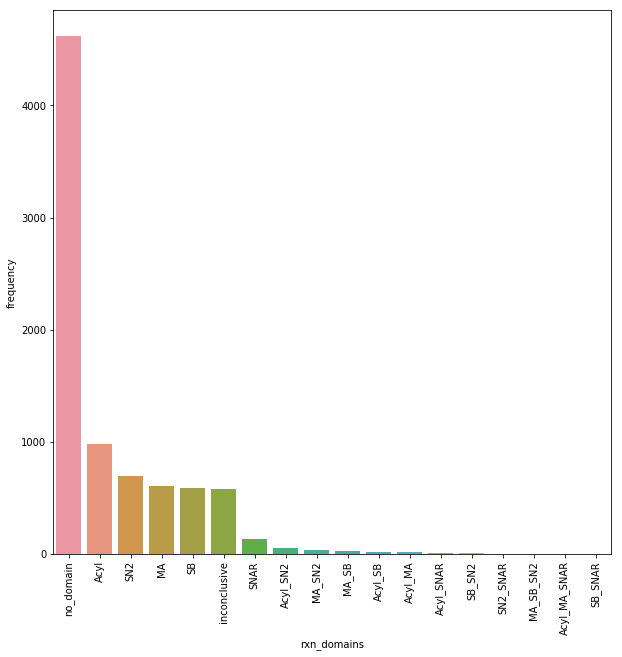

In [189]:
plt.figure(1, figsize = (10,10))
g = sns.barplot('rxn_domains', 'frequency', data = count2)
g.set_xticklabels(g.get_xticklabels(),rotation = 90)

In [181]:
e_domains = [e for e in tuple(e) for e in tox21_rxn['Consensus_mech_v2']]
#tox21_rxn['Consensus_mech_v2'] = e_domains

NameError: name 'e' is not defined

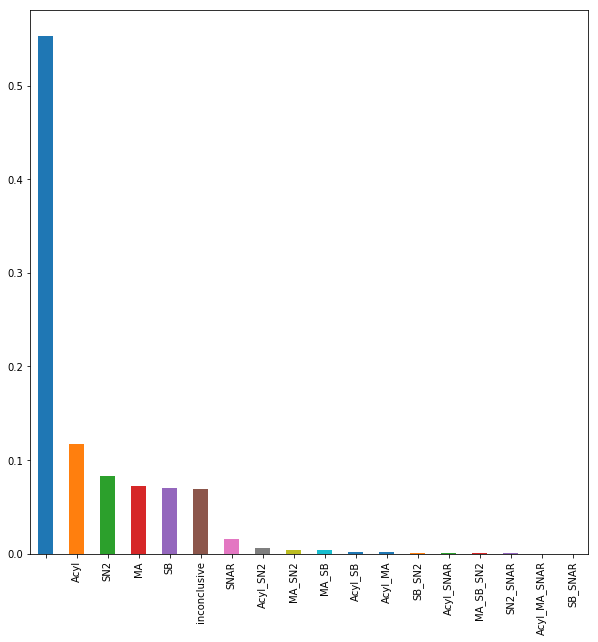

In [187]:
plt.figure(1, figsize = (10,10))
(tox21_rxn['rxn_domains'].value_counts()/len(tox21_rxn)).plot.bar()
#plt.yscale('log')

In [186]:
rxn_labels = ['_'.join(e) for e in tox21_rxn['Consensus_mech']]
tox21_rxn['rxn_domains'] = rxn_labels

In [188]:
tox21_rxn.head()

DTXSID Dow_domain         DTXSID Enoch_domain         DTXSID  \
0  DTXSID0020020         []  DTXSID0020020       [Acyl]  DTXSID0020020   
1  DTXSID0020022         []  DTXSID0020022           []  DTXSID0020022   
2  DTXSID0020024         []  DTXSID0020024           []  DTXSID0020024   
3  DTXSID0020070         []  DTXSID0020070         [SB]  DTXSID0020070   
4  DTXSID0020072         []  DTXSID0020072           []  DTXSID0020072   

     OECD   Enoch Dow OECD_domain Consensus_mech rxn_domains  
0  [Acyl]  [Acyl]  []      [Acyl]         [Acyl]        Acyl  
1      []      []  []          []             []              
2      []      []  []          []             []              
3    [SB]    [SB]  []        [SB]           [SB]          SB  
4      []      []  []          []             []

In [189]:
tox21_rxn['rxn_domains'] = tox21_rxn['rxn_domains'].replace('','no_domain')

#count['rxn_domains'].replace(r'^\s*$','no_domain', regex = True, inplace = True)

In [190]:
tox21_rxn[tox21_rxn['rxn_domains']== 'inconclusive']

DTXSID Dow_domain         DTXSID     Enoch_domain         DTXSID  \
9     DTXSID0020151         []  DTXSID0020151      [Acyl, SN2]  DTXSID0020151   
14    DTXSID0020238         []  DTXSID0020238           [Acyl]  DTXSID0020238   
45    DTXSID0020654         []  DTXSID0020654      [Acyl, SN2]  DTXSID0020654   
57    DTXSID0021096         []  DTXSID0021096      [Acyl, SN2]  DTXSID0021096   
80    DTXSID0021460         []  DTXSID0021460             [MA]  DTXSID0021460   
104   DTXSID0021969       [SB]  DTXSID0021969         [SB, MA]  DTXSID0021969   
115   DTXSID0022301         []  DTXSID0022301      [Acyl, SN2]  DTXSID0022301   
116   DTXSID0022305         []  DTXSID0022305             [MA]  DTXSID0022305   
138   DTXSID0022858         []  DTXSID0022858       [SB, Acyl]  DTXSID0022858   
139   DTXSID0022933       [MA]  DTXSID0022933        [SB, SN2]  DTXSID0022933   
144   DTXSID0023036         []  DTXSID0023036         [SB, MA]  DTXSID0023036   
149   DTXSID0023163         []  DTXSID0023163     [SNAR, Acyl]  DTXSID0023163   
154   DTXSID0023294       [MA]  DTXSID0023294        [SB, SN2]  DTXSID0023294   
170   DTXSID0023618         []  DTXSID0023618      [Acyl, SN2]  DTXSID0023618   
174   DTXSID0023749       [MA]  DTXSID0023749       [MA, Acyl]  DTXSID0023749   
182   DTXSID0023955     [SNAR]  DTXSID0023955     [SNAR, Acyl]  DTXSID0023955   
184   DTXSID0024002         []  DTXSID0024002      [Acyl, SN2]  DTXSID0024002   
211   DTXSID0024971       [SB]  DTXSID0024971       [SNAR, SB]  DTXSID0024971   
246   DTXSID0025997       [SB]  DTXSID0025997         [SB, MA]  DTXSID0025997   
300   DTXSID0027981         []  DTXSID0027981           [Acyl]  DTXSID0027981   
302   DTXSID0028038      [SN2]  DTXSID0028038           [Acyl]  DTXSID0028038   
308   DTXSID0029559         []  DTXSID0029559           [Acyl]  DTXSID0029559   
318   DTXSID0032572         []  DTXSID0032572  [SB, Acyl, SN2]  DTXSID0032572   
335   DTXSID0033960       [MA]  DTXSID0033960         [SB, MA]  DTXSID0033960   
374   DTXSID0040208       [MA]  DTXSID0040208         [SB, MA]  DTXSID0040208   
375   DTXSID0040464         []  DTXSID0040464      [Acyl, SN2]  DTXSID0040464   
381   DTXSID0040674       [MA]  DTXSID0040674    [SB, MA, SN2]  DTXSID0040674   
405   DTXSID0041646         []  DTXSID0041646           [Acyl]  DTXSID0041646   
411   DTXSID0041983         []  DTXSID0041983           [Acyl]  DTXSID0041983   
418   DTXSID0042117         []  DTXSID0042117           [Acyl]  DTXSID0042117   
...             ...        ...            ...              ...            ...   
8023  DTXSID9044877         []  DTXSID9044877       [MA, Acyl]  DTXSID9044877   
8044  DTXSID9045342         []  DTXSID9045342  [SB, Acyl, SN2]  DTXSID9045342   
8056  DTXSID9045502       [MA]  DTXSID9045502   [SB, MA, Acyl]  DTXSID9045502   
8060  DTXSID9045552         []  DTXSID9045552  [SB, Acyl, SN2]  DTXSID9045552   
8068  DTXSID9045683         []  DTXSID9045683       [SB, Acyl]  DTXSID9045683   
8079  DTXSID9045847         []  DTXSID9045847       [MA, Acyl]  DTXSID9045847   
8086  DTXSID9045924         []  DTXSID9045924           [Acyl]  DTXSID9045924   
8098  DTXSID9046106         []  DTXSID9046106  [SB, Acyl, SN2]  DTXSID9046106   
8105  DTXSID9046231  [MA, SN2]  DTXSID9046231               []  DTXSID9046231   
8119  DTXSID9046449         []  DTXSID9046449           [Acyl]  DTXSID9046449   
8122  DTXSID9046497         []  DTXSID9046497       [MA, Acyl]  DTXSID9046497   
8137  DTXSID9046609         []  DTXSID9046609       [SB, Acyl]  DTXSID9046609   
8140  DTXSID9046657         []  DTXSID9046657           [Acyl]  DTXSID9046657   
8141  DTXSID9046659       [MA]  DTXSID9046659   [SB, MA, Acyl]  DTXSID9046659   
8142  DTXSID9046730         []  DTXSID9046730  [SB, Acyl, SN2]  DTXSID9046730   
8157  DTXSID9046865      [SN2]  DTXSID9046865      [SNAR, SN2]  DTXSID9046865   
8161  DTXSID9046946         []  DTXSID9046946       [SB, Acyl]  DTXSID9046946   
8170  DTXSID9047091         []  DTXSID904709

[Text(0,0,'Acyl'),
 Text(0,0,'no_domain'),
 Text(0,0,'SB'),
 Text(0,0,'inconclusive'),
 Text(0,0,'SN2'),
 Text(0,0,'MA'),
 Text(0,0,'SNAR'),
 Text(0,0,'MA_SN2'),
 Text(0,0,'MA_SB'),
 Text(0,0,'Acyl_SB'),
 Text(0,0,'Acyl_SN2'),
 Text(0,0,'Acyl_MA'),
 Text(0,0,'SB_SN2'),
 Text(0,0,'Acyl_SNAR'),
 Text(0,0,'MA_SB_SN2'),
 Text(0,0,'Acyl_MA_SNAR'),
 Text(0,0,'SN2_SNAR'),
 Text(0,0,'SB_SNAR')]

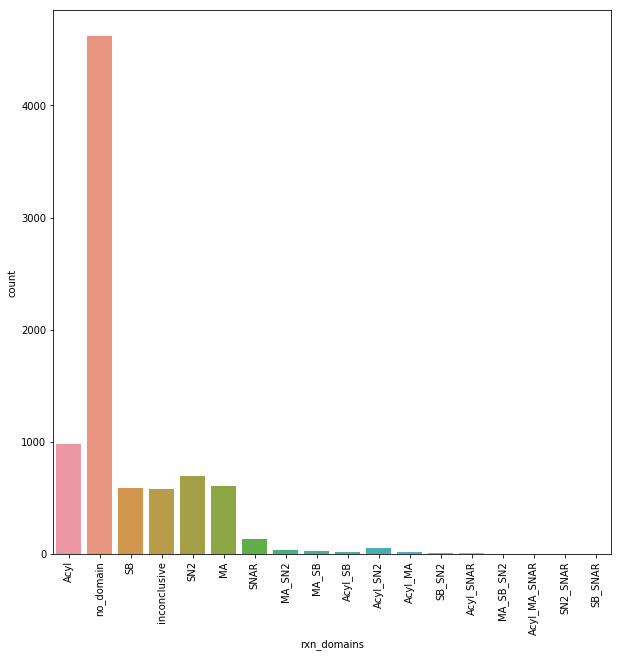

In [191]:
plt.figure(1, figsize = (10,10))
g = sns.countplot(tox21_rxn['rxn_domains'])
g.set_xticklabels(g.get_xticklabels(),rotation = 90)


In [387]:
counts = tox21_rxn.groupby(['rxn_domains']).count()


In [388]:
counts

DTXSID  Dow_domain  DTXSID  Enoch_domain  DTXSID  OECD  Enoch  \
rxn_domains                                                                   
Acyl             977         977     977           977     977   977    977   
Acyl_MA           15          15      15            15      15    15     15   
Acyl_MA_SNAR       1           1       1             1       1     1      1   
Acyl_SB           18          18      18            18      18    18     18   
Acyl_SN2          53          53      53            53      53    53     53   
Acyl_SNAR          9           9       9             9       9     9      9   
MA               607         607     607           607     607   607    607   
MA_SB             29          29      29            29      29    29     29   
MA_SB_SN2          2           2       2             2       2     2      2   
MA_SN2            30          30      30            30      30    30     30   
SB               584         584     584           584     584   584    584   
SB_SN2             9           9       9             9       9     9      9   
SB_SNAR            1           1       1             1       1     1      1   
SN2              692         692     692           692     692   692    692   
SN2_SNAR           2           2       2             2       2     2      2   
SNAR             132         132     132           132     132   132    132   
inconclusive     574         574     574           574     574   574    574   
no_domain       4619        4619    4619          4619    4619  4619   4619   

               Dow  OECD_domain  Consensus_mech  
rxn_domains                                      
Acyl           977          977             977  
Acyl_MA         15           15              15  
Acyl_MA_SNAR     1            1               1  
Acyl_SB         18           18              18  
Acyl_SN2        53           53              53  
Acyl_SNAR        9            9               9  
MA             607          607             607  
MA_SB           29           29              29  
MA_SB_SN2        2            2               2  
MA_SN2          30           30              30  
SB             584          584             584  
SB_SN2           9            9               9  
SB_SNAR          1            1               1  
SN2            692          692             692  
SN2_SNAR         2            2               2  
SNAR           132          132             132  
inconclusive   574          574             574  
no_domain     4619         4619            4619

In [389]:
tox21_rxn['rxn_domains'].value_counts(normalize=True)

no_domain       0.552909
Acyl            0.116950
SN2             0.082835
MA              0.072660
SB              0.069907
inconclusive    0.068710
SNAR            0.015801
Acyl_SN2        0.006344
MA_SN2          0.003591
MA_SB           0.003471
Acyl_SB         0.002155
Acyl_MA         0.001796
Acyl_SNAR       0.001077
SB_SN2          0.001077
SN2_SNAR        0.000239
MA_SB_SN2       0.000239
SB_SNAR         0.000120
Acyl_MA_SNAR    0.000120
Name: rxn_domains, dtype: float64

In [124]:
4619/8354

0.5529087862101987

In [192]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('tox21_rxn.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tox21_rxn.to_excel(writer, sheet_name='tox_rxn')

# Close the Pandas Excel writer and output the Excel file.
writer.save()